# Understanding Altair

In [3]:
import pandas as pd
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


In [4]:
data = pd.DataFrame({
    'a': list('CCCDDDEEE'),
    'b': [2,7,4,1,2,6,8,4,7]
})
print(data)

   a  b
0  C  2
1  C  7
2  C  4
3  D  1
4  D  2
5  D  6
6  E  8
7  E  4
8  E  7


In [5]:
# Defining the chart object
import altair as alt
chart = alt.Chart(data)

In [6]:
chart.mark_point()

Here the rendering consists of one point per row in the dataset, all plotted on top of each other, since we have not yet specified positions for these points.

To visually separate the points, we can map various encoding channels, or channels for short, to columns in the dataset. For example, we could encode the variable `a` of the data with the `x` channel, which represents the x-axis position of the points. 

This can be done straightforwardly via the `Chart.encode()` method:

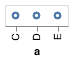

In [7]:
alt.Chart(data).mark_point().encode(
    x='a'
)

The `encode()` method builds a key-value mapping between encoding channels (such as `x`, `y`, `color`, `shape`, `size`, etc.) to columns in the dataset, accessed by column name.

For pandas dataframes, Altair automatically determines the appropriate data type for the mapped column, which in this case is a nominal value, or an unordered categorical.

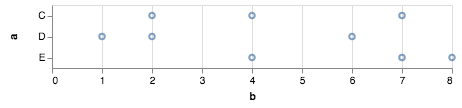

In [8]:
alt.Chart(data).mark_point().encode(
    x='b',
    y='a'
)

Altair has inferred in its encoding process the type of columns it is working with. It identify `a` as an unordered categorical column and `b` as a quantitative type.

# Aggregation

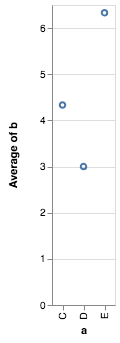

In [10]:
alt.Chart(data).mark_point().encode(
    x='a',
    y='average(b)'
)

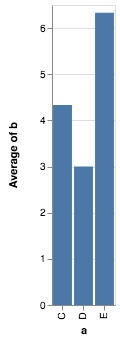

In [11]:
alt.Chart(data).mark_bar().encode(
    x='a',
    y='average(b)'
)

## Examining the JSON using `to.json()`

In [12]:
chart = alt.Chart(data).mark_bar().encode(
    x = 'a',
    y = 'average(b)'
)
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.6.0.json",
  "config": {
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-347f1284ea3247c0f55cb966abbdd2d8"
  },
  "datasets": {
    "data-347f1284ea3247c0f55cb966abbdd2d8": [
      {
        "a": "C",
        "b": 2
      },
      {
        "a": "C",
        "b": 7
      },
      {
        "a": "C",
        "b": 4
      },
      {
        "a": "D",
        "b": 1
      },
      {
        "a": "D",
        "b": 2
      },
      {
        "a": "D",
        "b": 6
      },
      {
        "a": "E",
        "b": 8
      },
      {
        "a": "E",
        "b": 4
      },
      {
        "a": "E",
        "b": 7
      }
    ]
  },
  "encoding": {
    "x": {
      "field": "a",
      "type": "nominal"
    },
    "y": {
      "aggregate": "average",
      "field": "b",
      "type": "quantitative"
    }
  },
  "mark": "bar"
}


Notice here that `encode(x='a')` has been expanded to a JSON structure with a `field` name, and a `type` for the data. The `encode(y='b')` has been expanded similarly and includes an `aggregate` field.

We can use the more verbose way of specifying channels:

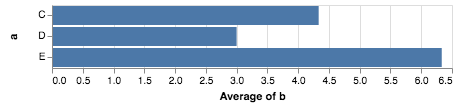

In [13]:
alt.Chart(data).mark_bar().encode(
    alt.Y('a', type='nominal'),
    alt.X('b', type='quantitative', aggregate='average')
)

Which has the same effect as the more concise form:

In [ ]:
alt.Chart(data).mark_bar().encode(
    y='a:n',
    x=''
)